In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Identify patterns to convert descriptive data to numerical

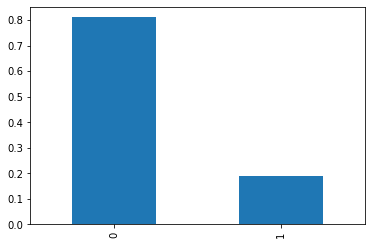

In [6]:
train_data.Survived[train_data.Sex == "male"].value_counts(normalize=True).plot(kind="bar")

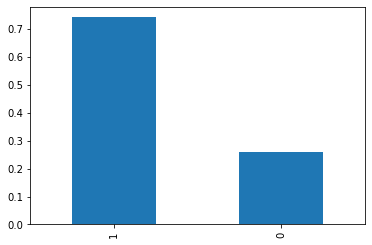

In [7]:
train_data.Survived[train_data.Sex == "female"].value_counts(normalize=True).plot(kind="bar")

# Females are more likely to survive than males

In [8]:
# Convert Sex to numerical value
train_data['Sex'] = train_data['Sex'].map({"male": 0, "female": 1}).astype(int)
test_data['Sex'] = test_data['Sex'].map({"male": 0, "female": 1}).astype(int)

In [9]:
# Is there a pattern in the Name Titles?
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Countess      1
Ms            1
Lady          1
Capt          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


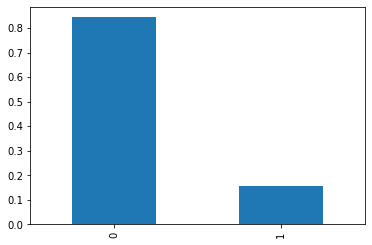

In [10]:
train_data.Survived[train_data.Title == "Mr"].value_counts(normalize=True).plot(kind="bar")

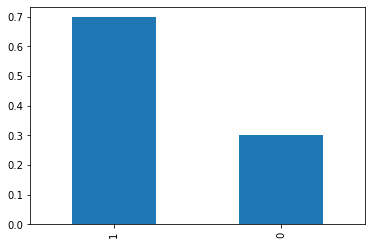

In [11]:
train_data.Survived[train_data.Title == "Miss"].value_counts(normalize=True).plot(kind="bar")

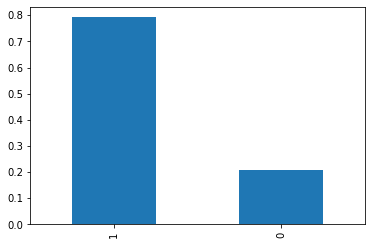

In [12]:
train_data.Survived[train_data.Title == "Mrs"].value_counts(normalize=True).plot(kind="bar")

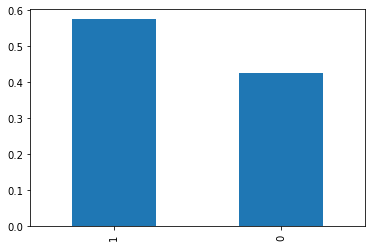

In [13]:
train_data.Survived[train_data.Title == "Master"].value_counts(normalize=True).plot(kind="bar")

# We can see that 
### 1. "Mr" has a high chance of dying
### 2. "Miss" and "Mrs" have a high chance of surviving 
### 3. "Master" has a 55-45 split so it seems inconclusive 


In [14]:
# Since Mr, Miss, and Mrs have a pattern give special lables to them and group the rest together
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

# Convert Title to numerical value
train_data['Title'] = train_data['Title'].map(title_map).astype(int)
test_data['Title'] = test_data['Title'].map(title_map).astype(int)

# Drop Name
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [17]:
# Fill in null Ages with median of each Title
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [18]:
# Fill in null AND 0 fare with median of that Pclass (as price goes up with class)
train_data['Fare'] = train_data['Fare'].replace(0,np.NaN)
test_data['Fare'] = test_data['Fare'].replace(0,np.NaN)

train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [19]:
# Fill in missing embarked with most popular embark location
# What is the most popular embark location?
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
# S is the most so use that 
train_data['Embarked'].fillna('S', inplace=True)

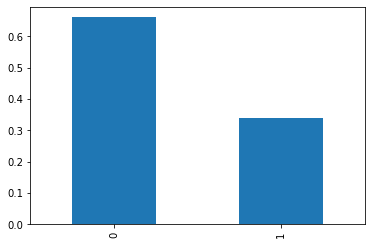

In [21]:
# Is there a relationship between embark and survival?
train_data.Survived[train_data.Embarked == "S"].value_counts(normalize=True).plot(kind="bar")

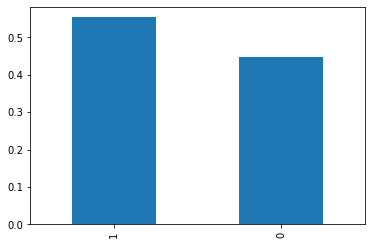

In [22]:
train_data.Survived[train_data.Embarked == "C"].value_counts(normalize=True).plot(kind="bar")

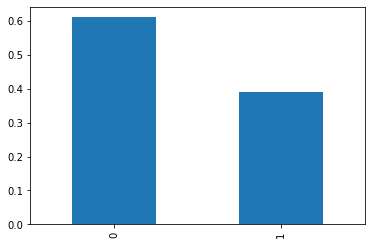

In [23]:
train_data.Survived[train_data.Embarked == "Q"].value_counts(normalize=True).plot(kind="bar")

## Embarking on "S" and "Q" have a higher rate of survival

In [24]:
# Convert Embarked to numerical value
train_data['Embarked'] = train_data['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype(int)

In [25]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,1,0


In [26]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [27]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [28]:
# Create Age Groups
for data in [train_data, test_data]:
    data.loc[ data['Age'] <= 17, 'Age'] = 0, # kid
    data.loc[(data['Age'] > 17) & (data['Age'] <= 30), 'Age'] = 1, # Young adult
    data.loc[(data['Age'] > 30) & (data['Age'] <= 50), 'Age'] = 2, # Adult
    data.loc[(data['Age'] > 50) & (data['Age'] <= 65), 'Age'] = 3, # Old Adult
    data.loc[ data['Age'] > 65, 'Age'] = 4 # Senior 

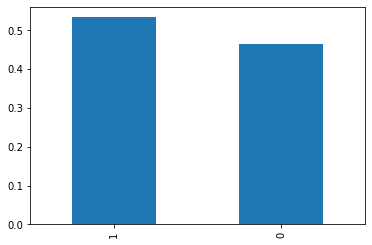

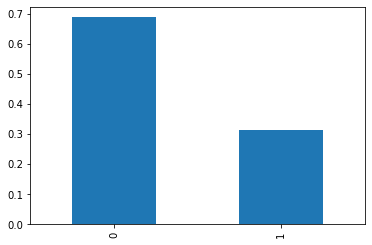

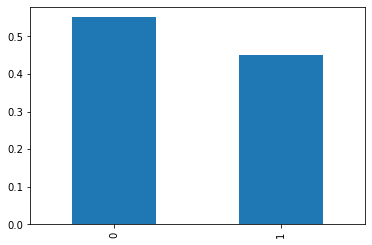

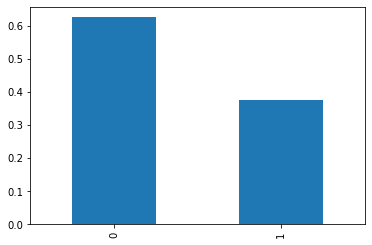

In [29]:
# Is there a relationship between Age and survival?
for x in [0,1,2,3]:
    plt.show(train_data.Survived[train_data.Age == x].value_counts(normalize=True).plot(kind="bar"))

## Higher chance of survival for kids under 18, lower chance of survival for seniors and young adults

In [30]:
# Create Fare Groups
# How? look at stats for both combines

# Split fares into 4 parts
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)

# Get median of each part
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(4.010999999999999, 7.925]",0.225664
1,"(7.925, 14.5]",0.286364
2,"(14.5, 31.275]",0.440000
3,"(31.275, 512.329]",0.586364


In [31]:
train_data.drop('FareBand', axis=1, inplace=True)
for data in [train_data, test_data]:
    data.loc[ data['Fare'] <= 8, 'Fare'] = 0,
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15), 'Fare'] = 1,
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 30), 'Fare'] = 2,
    data.loc[ data['Fare'] > 30, 'Fare'] = 3

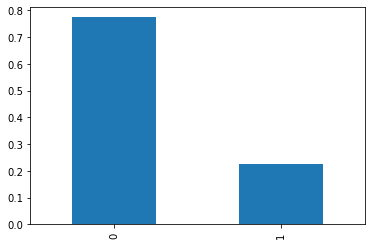

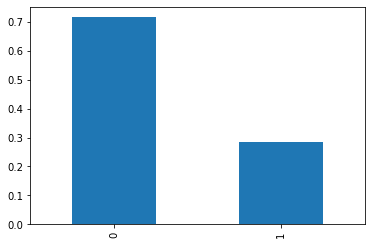

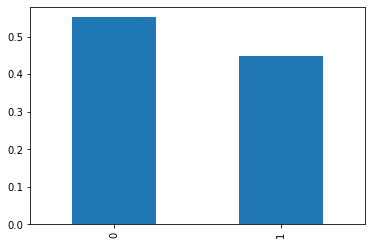

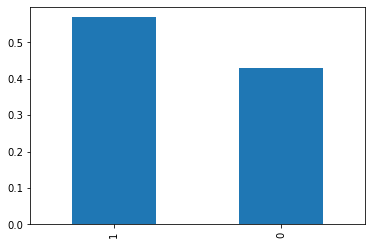

In [32]:
# Is there a relationship between Fare and survival?
for x in [0,1,2,3]:
    plt.show(train_data.Survived[train_data.Fare == x].value_counts(normalize=True).plot(kind="bar"))

## A fare above 30 has a high chance of survival and a fare below 30 has a higher chance of death

In [33]:
# Combine SibSp & Parch into a new column to get the size of a family
train_data["Family"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["Family"] = test_data["SibSp"] + test_data["Parch"] + 1

# Is there a relationship between family size and survival?
train_data["Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

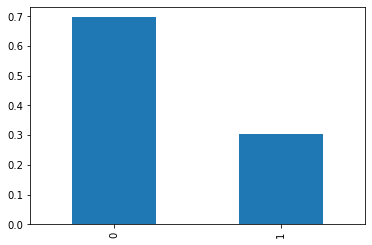

In [34]:
train_data.Survived[train_data.Family == 1].value_counts(normalize=True).plot(kind="bar")

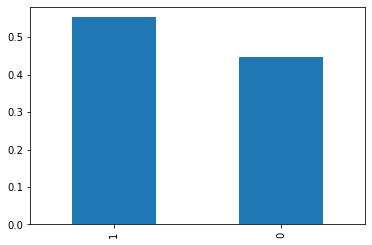

In [35]:
train_data.Survived[train_data.Family == 2].value_counts(normalize=True).plot(kind="bar")

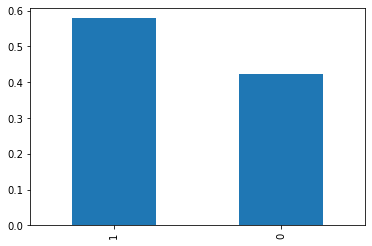

In [36]:
train_data.Survived[train_data.Family == 3].value_counts(normalize=True).plot(kind="bar")

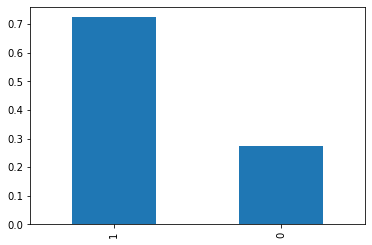

In [37]:
train_data.Survived[train_data.Family == 4].value_counts(normalize=True).plot(kind="bar")

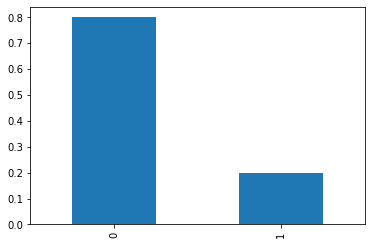

In [38]:
train_data.Survived[train_data.Family == 5].value_counts(normalize=True).plot(kind="bar")

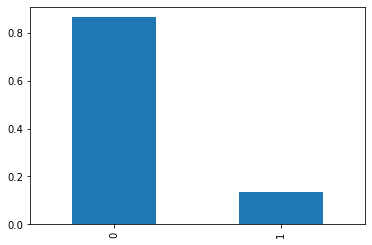

In [39]:
train_data.Survived[train_data.Family == 6].value_counts(normalize=True).plot(kind="bar")

## Families of size 2,3 and 4 have the highest chance of survival

In [40]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train_data['Family'] = train_data['Family'].map(family_mapping)
test_data['Family'] = test_data['Family'].map(family_mapping)

In [41]:
# drop unused columns
train_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('SibSp', axis=1, inplace=True)

train_data.drop('Parch', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

train_data.drop('PassengerId', axis=1, inplace=True)

# Drop Ticket as information is not needed
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

# Drop Cabin as there are too many empty rows
#train_data.drop('Cabin', axis=1, inplace=True)
#test_data.drop('Cabin', axis=1, inplace=True)

In [42]:
train_data.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
D7             1
C90            1
C128           1
A6             1
C87            1
Name: Cabin, Length: 147, dtype: int64

In [43]:
# Lets quantify Cabin by the first letter
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

train_data.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

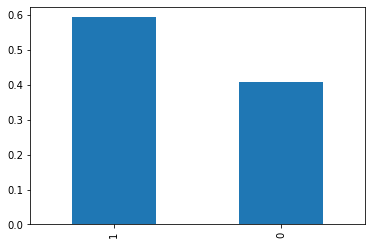

In [44]:
# Is there a relationship between cabin and survival
train_data.Survived[train_data.Cabin == "C"].value_counts(normalize=True).plot(kind="bar")

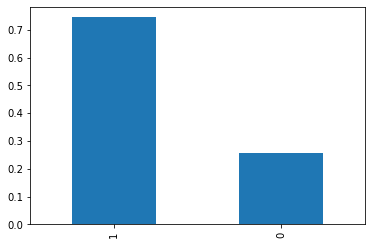

In [45]:
train_data.Survived[train_data.Cabin == "B"].value_counts(normalize=True).plot(kind="bar")

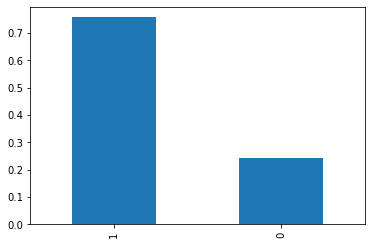

In [46]:
train_data.Survived[train_data.Cabin == "D"].value_counts(normalize=True).plot(kind="bar")

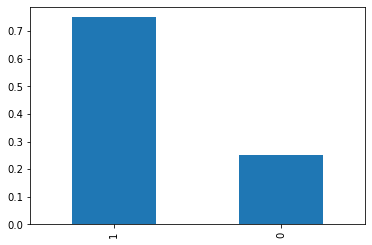

In [47]:
train_data.Survived[train_data.Cabin == "E"].value_counts(normalize=True).plot(kind="bar")

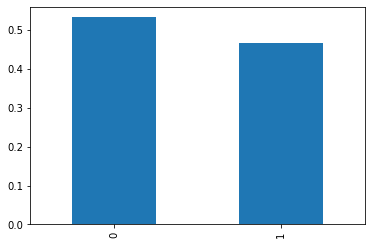

In [48]:
train_data.Survived[train_data.Cabin == "A"].value_counts(normalize=True).plot(kind="bar")

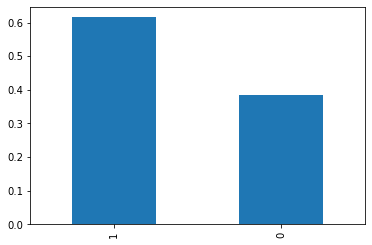

In [49]:
train_data.Survived[train_data.Cabin == "F"].value_counts(normalize=True).plot(kind="bar")

## Cabin A and F have lower chances of survival compared to the rest

In [50]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train_data['Cabin'] = train_data['Cabin'].map(cabin_mapping)
test_data['Cabin'] = test_data['Cabin'].map(cabin_mapping)

# fill in null
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [51]:
train_data


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,2.0,3.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,3.0,0.8,0,2,0.4
4,0,3,0,2.0,1.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,1.0,1.8,0,3,0.0
887,1,1,1,1.0,2.0,0.4,0,1,0.0
888,0,3,1,1.0,2.0,2.0,0,1,1.2
889,1,1,0,1.0,2.0,0.8,1,0,0.0


In [52]:
test_data


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,2.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,1.0,2.0,2,0,0.0
3,895,3,0,1.0,1.0,2.0,0,0,0.0
4,896,3,1,1.0,1.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,1.0,2.0,0,0,0.0
414,1306,1,1,2.0,3.0,0.8,1,3,0.0
415,1307,3,0,2.0,0.0,2.0,0,0,0.0
416,1308,3,0,1.0,1.0,2.0,0,0,0.0


In [53]:
# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# y = train_data["Survived"]

# features = ["Pclass", "Age", "Sex", "Family", "Fare", "Embarked", "Title"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")


X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=1)
model.fit(X,y)


predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [54]:
print(model.score(X,y))

0.8911335578002245
